In [40]:
#run these commands to install dependencies
#sudo apt install python3-pip
#pip3 install torch torchvision matplotlib

from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
import numpy as np


train_data = datasets.MNIST(
    root="data",
    train=True,
    transform=ToTensor(),
    download=True
)


test_data = datasets.MNIST(
    root="data",
    train=False,
    transform=ToTensor(),
    download=True
)

loaders = {
    'train': DataLoader(
        train_data, 
        batch_size=100, 
        shuffle=True,
        num_workers=1),

    'test': DataLoader(
        test_data,
        batch_size=100,
        shuffle=True,
        num_workers=1)
}

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5) #defining the structure of the network
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10) #the output layer must have 10 neurons, one for each digit
        # self.argmax = torch.argmax

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        #x = F.max_pool2d(x, 2, 2)
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        #x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)

        return F.log_softmax(x, dim=1)
    
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)}] ({100. * batch_idx/len(loaders["train"]):.0f}%)]\t Loss: {loss.item():.6f}')

def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loaders['test'].dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders["test"].dataset)} ({100. * correct/len(loaders["test"].dataset):.0f}%)\n')


for epoch in range(1, 11):
    train(epoch)
    test()

import matplotlib.pyplot as plt

model.eval()

# the data is the numerical representation of the image
# the number is the index, not the expected digit
data, target = test_data[2]
output = model

print(f'Prediction:')

# use the trained model to predict the value for the provided data
pred = model(data)

# figure out which 'class' (number) the image is in
im_class = torch.argmax(pred[0], axis=-1)

# figure out confidence level
probs = torch.nn.functional.softmax(pred, dim=1)
conf, classes = torch.max(probs, 1)

# print out class and confidence predictions
print(f'Predicted digit: {im_class.item()}')
print(f'Prediction confidence: {conf.item()}')

# This prints the image
plt.imshow(data.reshape(28, 28), cmap='gray')
plt.show()

Train Epoch: 1 [0/60000] (0%)]	 Loss: 2.285701
Train Epoch: 1 [2000/60000] (3%)]	 Loss: 2.201091
Train Epoch: 1 [4000/60000] (7%)]	 Loss: 1.715561
Train Epoch: 1 [6000/60000] (10%)]	 Loss: 1.150471
Train Epoch: 1 [8000/60000] (13%)]	 Loss: 0.983045
Train Epoch: 1 [10000/60000] (17%)]	 Loss: 0.864125
Train Epoch: 1 [12000/60000] (20%)]	 Loss: 0.697561
Train Epoch: 1 [14000/60000] (23%)]	 Loss: 0.867574
Train Epoch: 1 [16000/60000] (27%)]	 Loss: 0.619673
Train Epoch: 1 [18000/60000] (30%)]	 Loss: 0.755429
Train Epoch: 1 [20000/60000] (33%)]	 Loss: 0.591751
Train Epoch: 1 [22000/60000] (37%)]	 Loss: 0.578124
Train Epoch: 1 [24000/60000] (40%)]	 Loss: 0.470701
Train Epoch: 1 [26000/60000] (43%)]	 Loss: 0.732513
Train Epoch: 1 [28000/60000] (47%)]	 Loss: 0.291784
Train Epoch: 1 [30000/60000] (50%)]	 Loss: 0.326609
Train Epoch: 1 [32000/60000] (53%)]	 Loss: 0.387344
Train Epoch: 1 [34000/60000] (57%)]	 Loss: 0.619777
Train Epoch: 1 [36000/60000] (60%)]	 Loss: 0.455154
Train Epoch: 1 [38000/6

KeyboardInterrupt: 

3
Prediction:
Predicted digit: 1
Prediction confidence: 0.9991633892059326


C:\Users\nhien\AppData\Roaming\Python\Python312\site-packages\torch\nn\functional.py:1354: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H, W). To maintain the 1D channel-wise dropout behavior, please switch to using dropout1d instead.
  warnings.warn("dropout2d: Received a 3D input to dropout2d and assuming that channel-wise "


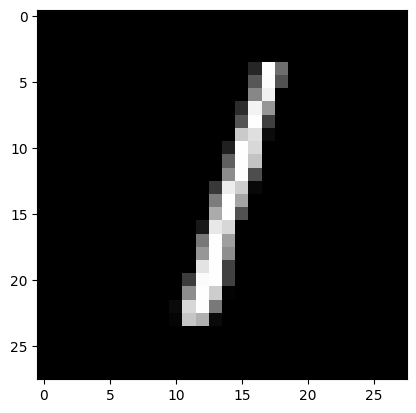

In [60]:
# the data is the numerical representation of the image
# the number is the index, not the expected digit
data, target = test_data[2]
print(data.dim())
output = model

print(f'Prediction:')

# use the trained model to predict the value for the provided data
pred = model(data)

# figure out which 'class' (number) the image is in
im_class = torch.argmax(pred[0], axis=-1)

# figure out confidence level
probs = torch.nn.functional.softmax(pred, dim=1)
conf, classes = torch.max(probs, 1)

# print out class and confidence predictions
print(f'Predicted digit: {im_class.item()}')
print(f'Prediction confidence: {conf.item()}')

# This prints the image
plt.imshow(data.reshape(28, 28), cmap='gray')
plt.show()

In [ ]:
torch.save(model, "C:/Users/nhien/OneDrive - Liberty University/Class Notes/SEMESTER 4 (SPRING 2024)/CSCN 345/mnist_awesome.pickle")

In [49]:
%pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 495.5 kB/s eta 0:01:18
   ---------------------------------------- 0.1/38.6 MB 657.6 kB/s eta 0:00:59
   ---------------------------------------- 0.1/38.6 MB 731.4 kB/s eta 0:00:53
   ---------------------------------------- 0.1/38.6 MB 778.5 kB/s eta 0:00:50
   ---------------------------------------- 0.2/38.6 MB 787.7 kB/s eta 0:00:49
   ---------------------------------------- 0.2/38.6 MB 795.7 kB/s eta 0:00:49
   ---------------------------------------- 0.3/38.6 MB 811.7 kB/s eta 0:00:48
   ---------------------------------------- 0.3/38.6 MB 827.2 kB/s eta 0:00:47
   ---------------------------------------- 0.3/38.6 MB 827.2 kB/s eta 0:00:47
   ---------------------------------------- 0.3/38.6 MB 723.4 kB/s eta 

3
Prediction:
Predicted digit: 8
Prediction confidence: 1.0


C:\Users\nhien\AppData\Roaming\Python\Python312\site-packages\torch\nn\functional.py:1354: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H, W). To maintain the 1D channel-wise dropout behavior, please switch to using dropout1d instead.
  warnings.warn("dropout2d: Received a 3D input to dropout2d and assuming that channel-wise "


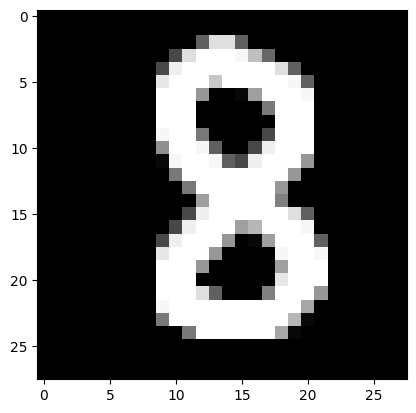

In [72]:
# the data is the numerical representation of the image
# the number is the index, not the expected digit
# data, target = test_data[2]
import torchvision
data = torchvision.io.read_image("C:/Users/nhien/Downloads/one_sample.png", torchvision.io.ImageReadMode.GRAY)
data = data.float()
print(data.dim())
pickle_model = torch.load("C:/Users/nhien/OneDrive - Liberty University/Class Notes/SEMESTER 4 (SPRING 2024)/CSCN 345/mnist_awesome.pickle")

print(f'Prediction:')

# use the trained model to predict the value for the provided data
pred = pickle_model(data)

# figure out which 'class' (number) the image is in
im_class = torch.argmax(pred[0], axis=-1)

# figure out confidence level
probs = torch.nn.functional.softmax(pred, dim=1)
conf, classes = torch.max(probs, 1)

# print out class and confidence predictions
print(f'Predicted digit: {im_class.item()}')
print(f'Prediction confidence: {conf.item()}')

# This prints the image
plt.imshow(data.reshape(28, 28), cmap='gray')
plt.show()